In [174]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import RobustScaler

from datetime import datetime, timezone,timedelta
from ta.utils import dropna
from ta.volatility import BollingerBands, AverageTrueRange
from ta.momentum import KAMAIndicator, PercentagePriceOscillator, PercentageVolumeOscillator, ROCIndicator, RSIIndicator, StochasticOscillator
from ta.trend import MACD, ADXIndicator, AroonIndicator
from ta.volume import OnBalanceVolumeIndicator, AccDistIndexIndicator

In [175]:
end = datetime.today() - timedelta(days=46)
start = datetime(2000, 9, 1)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)

df = pd.DataFrame(data=ETH)

kama_indicator = KAMAIndicator(close = df["Close"], window = 10, pow1 = 2, pow2 = 30, fillna = False)
df['kama'] = kama_indicator.kama()
ppo_indicator = PercentagePriceOscillator(close = df["Close"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['ppo'] = ppo_indicator.ppo()
pvo_indicator = PercentageVolumeOscillator(volume = df["Volume"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['pvo'] = pvo_indicator.pvo()
roc_indicator = ROCIndicator(close = df["Close"], window = 12, fillna = False)
df['roc'] = roc_indicator.roc()
macd_indicator = MACD(close = df["Close"], window_slow = 20, window_fast = 12, window_sign = 9, fillna = False)
df['macd'] = macd_indicator.macd()
rsi_indicator = RSIIndicator(close = df["Close"], window = 14, fillna = False)
df['rsi'] = rsi_indicator.rsi()
obv_indicator = OnBalanceVolumeIndicator(close = df["Close"], volume = df["Volume"], fillna = False)
df['obv'] = obv_indicator.on_balance_volume() 
adi_indicator = AccDistIndexIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], fillna = False)
df['adi'] = adi_indicator.acc_dist_index() 
adx_indicator = ADXIndicator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['adx'] = adx_indicator.adx() 
aroon_indicator = AroonIndicator(close = df["Close"], window = 20, fillna = False)
df['aroon'] = aroon_indicator.aroon_indicator()
stoo_indicator = StochasticOscillator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, smooth_window = 3, fillna = False)
df['stoo'] = stoo_indicator.stoch()
boll_indicator = BollingerBands(close = df["Close"], window = 20, window_dev = 2, fillna = False)
df['boll_mavg'] = boll_indicator.bollinger_mavg()
atr_indicator = AverageTrueRange(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['atr'] = atr_indicator.average_true_range()
df.rename(columns = {"Close": "price"}, inplace=True)
prices = df['price'].to_numpy()

increase = []
for i in range(0, len(prices)):
    if(i == len(prices)-1):
        increase.append(1)
    else:
        if(prices[i+1] > prices[i]):
            increase.append(1)
        else:
            increase.append(0)

df['increase'] = increase

df.dropna(inplace=True)
df = df.drop(df.columns[[0, 1, 2, 4, 5]], axis=1)
df

,price,kama,ppo,pvo,roc,macd,rsi,obv,adi,adx,aroon,stoo,boll_mavg,atr,increase
Date,,,,,,,,,,,,,,,
2015-08-25,1.159980,1.405750,-13.445239,0.772090,-36.539248,-0.166625,35.737493,7.450940e+05,-2.226652e+06,0.000000,-10.0,8.178828,1.340227,0.400591,0
2015-08-26,1.147700,1.402955,-13.377194,-4.311565,-32.044529,-0.162148,35.483536,5.843200e+04,-2.635933e+06,0.000000,25.0,7.155528,1.259006,0.375659,1
2015-08-27,1.191380,1.398493,-12.841273,-8.205707,-23.923552,-0.153785,37.193189,7.803040e+05,-2.185476e+06,0.000000,25.0,15.887712,1.280909,0.355061,0
2015-08-28,1.182550,1.394309,-12.305072,-13.951193,-1.749735,-0.145647,36.979851,4.049270e+05,-2.130847e+06,0.000000,20.0,19.058732,1.304942,0.333823,1
2015-08-29,1.319270,1.390506,-10.768333,-10.893690,21.362409,-0.129269,42.481178,1.742577e+06,-1.453551e+06,0.000000,15.0,49.568699,1.335483,0.324077,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22,1236.512207,1206.445263,7.097784,8.786998,-2.038785,67.617759,58.461031,1.055966e+12,1.251418e+12,33.791964,85.0,61.411796,1190.465381,142.420937,0
2021-01-23,1230.990601,1206.975004,6.412212,5.044515,12.919856,62.259214,58.102078,1.028712e+12,1.247187e+12,31.997002,80.0,60.323532,1203.239526,137.337857,1
2021-01-24,1391.609375,1213.920119,6.901073,4.218413,33.368149,66.658216,64.860984,1.065130e+12,1.282103e+12,31.302432,60.0,91.980196,1220.808344,139.659244,0


In [176]:
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

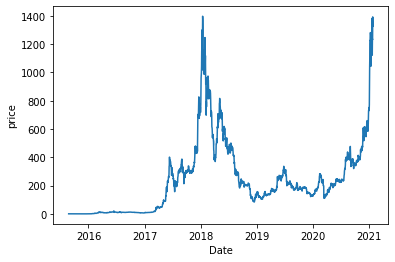

In [177]:
sns.lineplot(x=df.index, y="price", data=df);

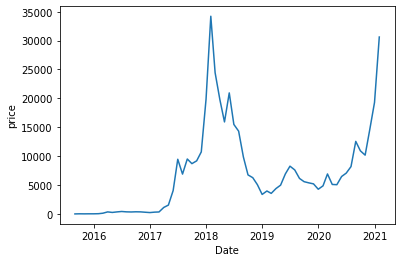

In [178]:
df_by_month = df.resample('M').sum()

sns.lineplot(x=df_by_month.index, y="price", data=df_by_month);

In [179]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(1779, 18) (198, 18)


In [180]:
label_columns = ['kama', 'ppo', 'pvo', 'roc', 'macd', 'rsi', 'obv', 'adi',
       'adx', 'aroon', 'stoo', 'boll_mavg', 'atr', 'increase', 'day_of_month', 'day_of_week', 'month']

label_transformer = RobustScaler()
price_transformer = RobustScaler()

label_transformer = label_transformer.fit(train[label_columns].to_numpy())
price_transformer = price_transformer.fit(train[['price']])

train.loc[:, label_columns] = label_transformer.transform(train[label_columns].to_numpy())
train['price'] = price_transformer.transform(train[['price']])

test.loc[:, label_columns] = label_transformer.transform(test[label_columns].to_numpy())
test['price'] = price_transformer.transform(test[['price']])

/Users/michi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/michi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [181]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [182]:
time_steps = 30

X_train, y_train = create_dataset(train, train.price, time_steps)
X_test, y_test = create_dataset(test, test.price, time_steps)

print(X_train.shape, y_train.shape)

(1749, 30, 18) (1749,)


In [183]:
X_test.shape

(168, 30, 18)

In [184]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [185]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
50/50 [==============================] - 5s 32ms/step - loss: 0.3096 - val_loss: 0.2218
Epoch 2/30
50/50 [==============================] - 1s 20ms/step - loss: 0.2264 - val_loss: 0.0388
Epoch 3/30
50/50 [==============================] - 1s 21ms/step - loss: 0.0649 - val_loss: 0.0138
Epoch 4/30
50/50 [==============================] - 1s 20ms/step - loss: 0.0465 - val_loss: 0.0659
Epoch 5/30
50/50 [==============================] - 1s 21ms/step - loss: 0.0333 - val_loss: 0.0808
Epoch 6/30
50/50 [==============================] - 1s 20ms/step - loss: 0.0346 - val_loss: 0.0198
Epoch 7/30
50/50 [==============================] - 1s 20ms/step - loss: 0.0378 - val_loss: 0.0174
Epoch 8/30
50/50 [==============================] - 1s 21ms/step - loss: 0.0377 - val_loss: 0.0188
Epoch 9/30
50/50 [==============================] - 1s 22ms/step - loss: 0.0510 - val_loss: 0.0253
Epoch 10/30
50/50 [==============================] - 1s 22ms/step - loss: 0.0684 - val_loss: 0.0274
Epoch 11/

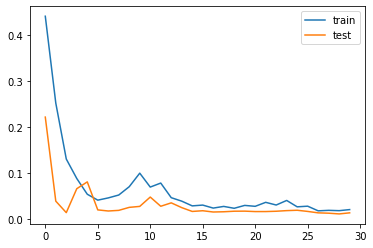

In [186]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [187]:
y_pred = model.predict(X_test)

In [188]:
y_train_inv = price_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = price_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = price_transformer.inverse_transform(y_pred)

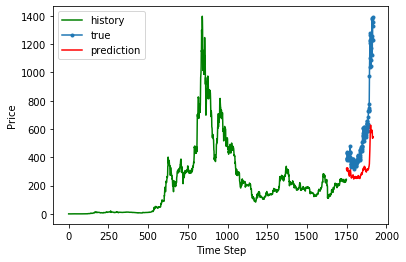

In [189]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Price')
plt.xlabel('Time Step')
plt.legend()
plt.show();

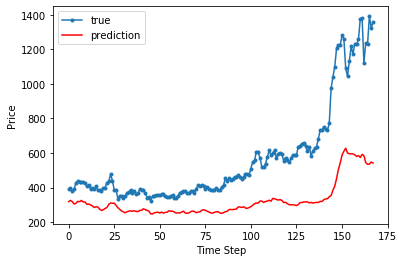

In [190]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Price')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [198]:
end = datetime.today()
start = datetime.today() - timedelta(days=56)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)

df = pd.DataFrame(data=ETH)

kama_indicator = KAMAIndicator(close = df["Close"], window = 10, pow1 = 2, pow2 = 30, fillna = False)
df['kama'] = kama_indicator.kama()
ppo_indicator = PercentagePriceOscillator(close = df["Close"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['ppo'] = ppo_indicator.ppo()
pvo_indicator = PercentageVolumeOscillator(volume = df["Volume"], window_slow = 20, window_fast = 10, window_sign = 9, fillna = False)
df['pvo'] = pvo_indicator.pvo()
roc_indicator = ROCIndicator(close = df["Close"], window = 12, fillna = False)
df['roc'] = roc_indicator.roc()
macd_indicator = MACD(close = df["Close"], window_slow = 20, window_fast = 12, window_sign = 9, fillna = False)
df['macd'] = macd_indicator.macd()
rsi_indicator = RSIIndicator(close = df["Close"], window = 14, fillna = False)
df['rsi'] = rsi_indicator.rsi()
obv_indicator = OnBalanceVolumeIndicator(close = df["Close"], volume = df["Volume"], fillna = False)
df['obv'] = obv_indicator.on_balance_volume() 
adi_indicator = AccDistIndexIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], fillna = False)
df['adi'] = adi_indicator.acc_dist_index() 
adx_indicator = ADXIndicator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['adx'] = adx_indicator.adx() 
aroon_indicator = AroonIndicator(close = df["Close"], window = 20, fillna = False)
df['aroon'] = aroon_indicator.aroon_indicator()
stoo_indicator = StochasticOscillator(high = df["High"], low = df["Low"], close = df["Close"], window = 14, smooth_window = 3, fillna = False)
df['stoo'] = stoo_indicator.stoch()
boll_indicator = BollingerBands(close = df["Close"], window = 20, window_dev = 2, fillna = False)
df['boll_mavg'] = boll_indicator.bollinger_mavg()
atr_indicator = AverageTrueRange(high = df["High"], low = df["Low"], close = df["Close"], window = 14, fillna = False)
df['atr'] = atr_indicator.average_true_range()
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df.rename(columns = {"Close": "price"}, inplace=True)


increase = []
for i in range(0, len(df)):
    if(i == len(prices)-1):
        increase.append(1)
    else:
        if(prices[i+1] > prices[i]):
            increase.append(1)
        else:
            increase.append(0)
df['increase'] = increase

df.dropna(inplace=True)
df =  df.drop(df.columns[[0, 1, 2, 4, 5]], axis=1)
predict =  df.iloc[:len(df)]

label_columns = ['kama', 'ppo', 'pvo', 'roc', 'macd', 'rsi', 'obv', 'adi',
       'adx', 'aroon', 'stoo', 'boll_mavg', 'atr', 'increase', 'day_of_month', 'day_of_week', 'month']

label_transformer = RobustScaler()
price_transformer = RobustScaler()

price_transformer = price_transformer.fit(predict[['price']])

label_transformer = label_transformer.fit(predict[label_columns].to_numpy())

predict.loc[:, label_columns] = label_transformer.transform(predict[label_columns].to_numpy())
predict['price'] = price_transformer.transform(predict[['price']])

Xs = []
v = predict.values
Xs.append(v)

X_predict= np.array(Xs)

X_predict.shape

y_predicted = model.predict(X_predict)

y_predicted_inv = price_transformer.inverse_transform(y_predicted)

y_predicted_inv

/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/michi/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


array([[1643.3348]], dtype=float32)